In [1]:
from scipy.ndimage import gaussian_filter
import math
import matplotlib.pyplot as plt
from contour_scanning import *
import numpy as np

In [4]:
noisy_data, synth_data, block_height, core_height = generate_synthetic_data()

Core height is 17.275482769647677
Adding block at 528 to 575


Text(0.5, 1.0, 'Synthetic data')

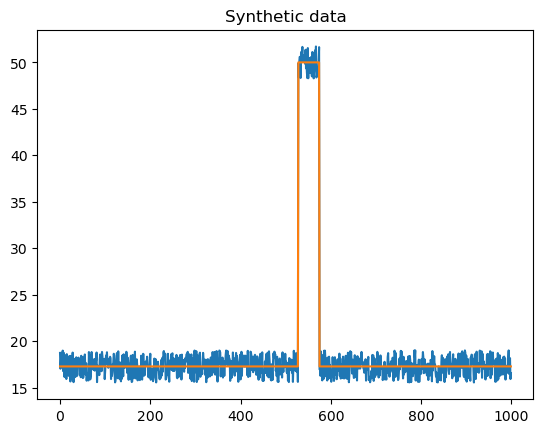

In [5]:
# View the generated data with and without noise
x_axis = [i for i in range(len(noisy_data))]
plt.figure()
plt.plot(x_axis, noisy_data, synth_data)
plt.title("Synthetic data")

In [6]:
# Smooth the noisy data, apply the detection algorithm on this, and view the results
smoothed = gaussian_filter(noisy_data, sigma=1)
start, end = detect_obstacle(data=smoothed)

detected = smoothed.copy()
low = math.inf
for i in range(len(detected)):
    if detected[i] < low:
        low = detected[i]
for i in range(len(detected)):
    if start <= i and i <= end:
        detected[i] = block_height
    else:
        detected[i] = core_height

Detected block at ( 528 , 575 ).


Text(0, 0.5, 'Elevation / height y (simulated mm)')

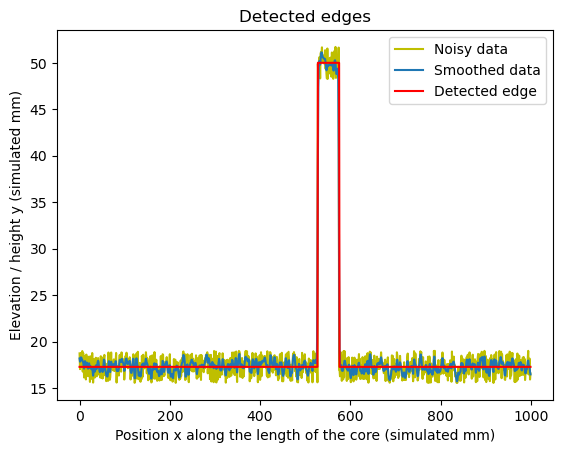

In [7]:
plt.figure()
plt.plot(x_axis, noisy_data, "y")
plt.plot(x_axis, smoothed)
plt.plot(x_axis, detected, "r")
plt.legend(["Noisy data", "Smoothed data", "Detected edge"])
plt.title("Detected edges")
plt.xlabel("Position x along the length of the core (simulated mm)")
plt.ylabel("Elevation / height y (simulated mm)")

In [8]:
noisy_data_2, synth_data_2, block_height_2, core_height_2 = generate_synthetic_data(block_height=30)

Core height is 7.155452853422268
Adding block at 412 to 453


In [9]:
smoothed_2 = gaussian_filter(noisy_data_2, sigma=3);
start_2, end_2 = detect_obstacle(data=smoothed_2)

detected_2 = smoothed_2.copy()
low_2 = math.inf
for i in range(len(detected_2)):
    if detected_2[i] < low_2:
        low_2 = detected_2[i]
for i in range(len(detected_2)):
    if start_2 <= i and i <= end_2:
        detected_2[i] = block_height_2
    else:
        detected_2[i] = core_height_2

Detected block at ( 412 , 453 ).


In [10]:
x_axis_focused = [i for i in range(max(start_2 - 30, 0), min(end_2 + 30, len(smoothed_2)) )]
xstart = x_axis_focused[0]
xend   = x_axis_focused[-1]

Text(0, 0.5, 'Elevation / height y (simulated mm)')

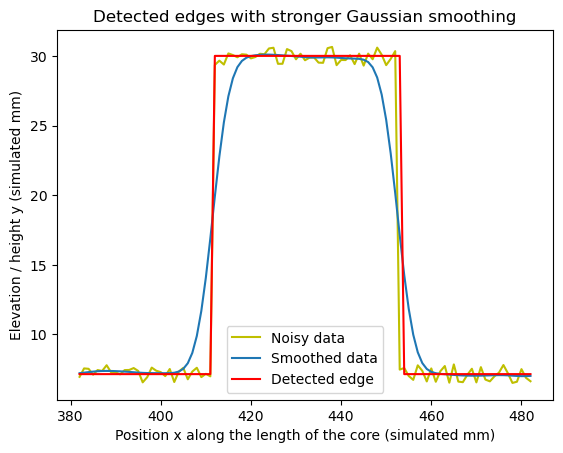

In [11]:
plt.figure()
plt.plot(x_axis_focused, noisy_data_2[xstart:xend+1], "y")
plt.plot(x_axis_focused, smoothed_2[xstart:xend+1])
plt.plot(x_axis_focused, detected_2[xstart:xend+1], "r")
plt.legend(["Noisy data", "Smoothed data", "Detected edge"])
plt.title("Detected edges with stronger Gaussian smoothing")
plt.xlabel("Position x along the length of the core (simulated mm)")
plt.ylabel("Elevation / height y (simulated mm)")